In [4]:
import matplotlib.pyplot as plt
import numpy as np

### 히스토그램
    hist() 함수를 사용
    데이터의 빈도에 따라서 막대 그래프의 높이가 결정된다.

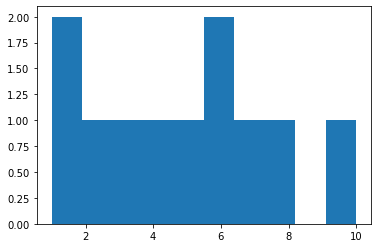

In [5]:
plt.hist([1,1,2,3,4,5,6,6,7,8,10])
plt.show()

In [6]:
dice = []
for i in range(5):
    dice.append(np.random.randint(1,7))
print(dice)

[2, 2, 5, 5, 2]


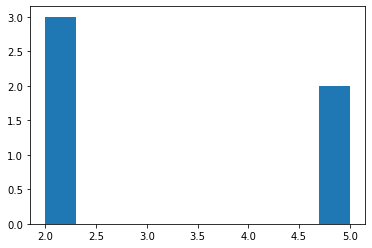

In [9]:
'''
bins
해당 막대 영역을 얼마나 채우는지를 결정하는 변수
이 값이 크면 영역이 더 촘촘하게 나눠지고
작으면 분포가 뭉뚱그려 진다.
'''
plt.hist(dice,bins=10)
plt.show()

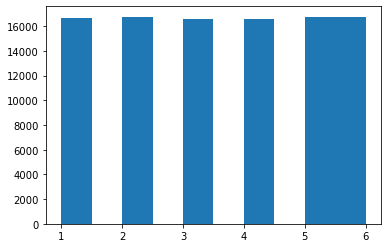

In [10]:
# 이번엔 주사위를 100000번 돌렸다고 가정해보자
dice = []
for i in range(100000):
    dice.append(np.random.randint(1,7))
#print(dice)
plt.hist(dice)
plt.show()
#주사위 던지는 횟수를 늘릴수록 특정한 주사위숫자가 나오는 횟수가 전체의 1/6에 가까워진다
#큰수의 법칙...

In [11]:
mu, sigma = 100,15
x = mu+sigma * np.random.randn(10000)
x.shape

(10000,)

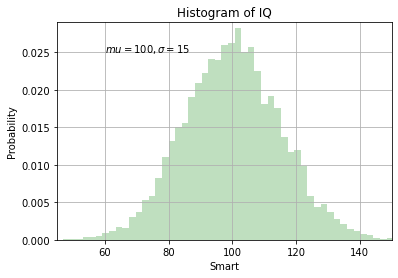

In [26]:
plt.hist(x,bins=50,
        facecolor='g',
        density=1,
        alpha=0.25) #투명도 0~1
plt.xlabel('Smart')
plt.ylabel('Probability')
plt.grid()
plt.title('Histogram of IQ')

plt.text(60,0.025,r'$mu=100, \sigma=15$') #r은 해석하지 말고 문자 그대로 받아들여라...raw
plt.axis([45,150,0,0.029])
plt.show()

### Seaborn

In [28]:
import seaborn as sns
import pandas as pd
import numpy as np
# https://seaborn.pydata.org

In [32]:
ts = pd.Series(np.random.randn(1000),
              index = pd.date_range('1/1/2000',periods = 1000))
ts

2000-01-01    0.243482
2000-01-02   -1.352801
2000-01-03   -0.000568
2000-01-04   -0.355980
2000-01-05    0.523855
                ...   
2002-09-22   -0.533079
2002-09-23    0.158121
2002-09-24   -0.881199
2002-09-25   -3.042585
2002-09-26    0.636685
Freq: D, Length: 1000, dtype: float64

<AxesSubplot:>

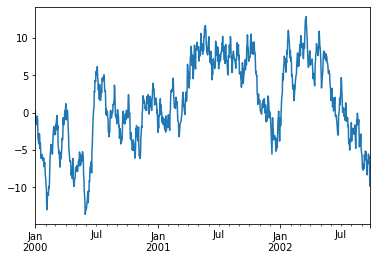

In [33]:
ts = ts.cumsum()
ts.plot() #x축으로는 2000/1/1부터 1000일 기간

<AxesSubplot:>

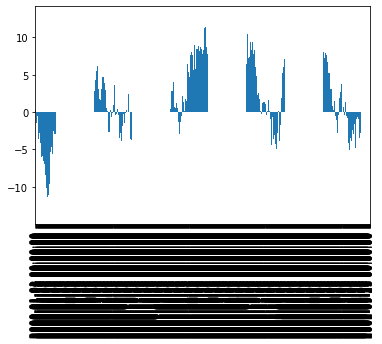

In [34]:
ts.plot(kind='bar')

### BoxPlot

In [37]:
# 0~100까지 총 101개의 숫자를 만든다.
xs = np.array(np.linspace(start=0,stop=100,num=101))
xs
df = pd.DataFrame(xs, columns=['feature'])
df

,feature
0,0.0
1,1.0
2,2.0
3,3.0
4,4.0
...,...
96,96.0
97,97.0
98,98.0
99,99.0


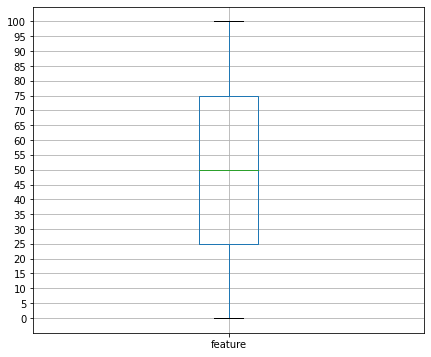

In [39]:
plt.figure(figsize=(7,6)) # 크키를 지정
boxplot = df.boxplot(column=['feature'])
plt.yticks(np.arange(0,101,step=5))
plt.show()

In [40]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


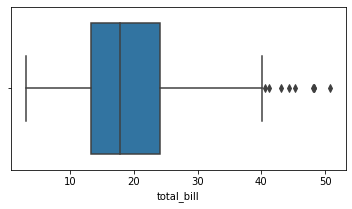

In [41]:
#total_bills값을 boxplot으로 표현해 보겠다.
plt.figure(figsize=(6,3))
sns.boxplot(x=tips['total_bill'])
plt.show()

In [42]:
tips.sort_values(by='total_bill',ascending=False)

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
156,48.17,5.00,Male,No,Sun,Dinner,6
182,45.35,3.50,Male,Yes,Sun,Dinner,3
...,...,...,...,...,...,...,...
149,7.51,2.00,Male,No,Thur,Lunch,2
111,7.25,1.00,Female,No,Sat,Dinner,1
172,7.25,5.15,Male,Yes,Sun,Dinner,2
92,5.75,1.00,Female,Yes,Fri,Dinner,2


<AxesSubplot:xlabel='day', ylabel='total_bill'>

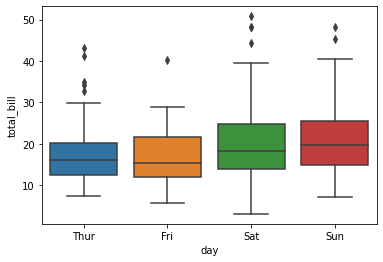

In [43]:
# 이번에는 날짜별로 데이터(total_bill)를 분석
sns.boxplot(x='day', y='total_bill', data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

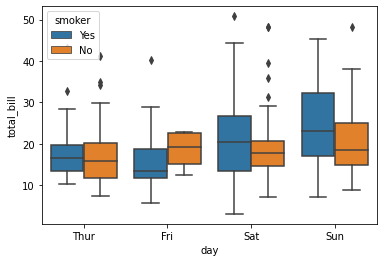

In [44]:
'''
요일별, 흡연여부별 전체음식값의 boxplot을 알아보자
즉 어느 요일에 / 흠연자 혹은 비흡연자가 음식지불액을 어떻게 지불했는지를 확인
비교 - - hue
'''
sns.boxplot(x='day', y='total_bill', hue='smoker', data=tips)

### lmPlot

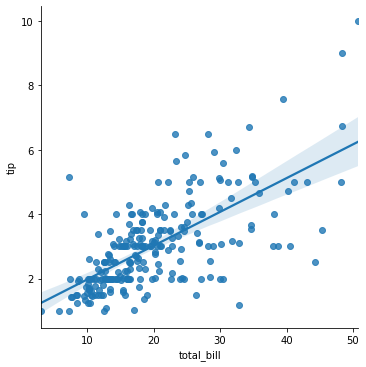

In [45]:
sns.lmplot(x='total_bill',y='tip',data=tips)

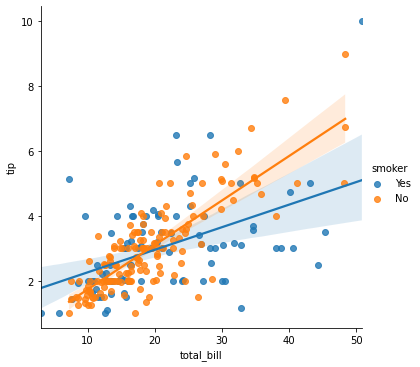

In [46]:
'''
흡연자, 비흡연자중에서 누가 더 팁을 많이 내는가...
전체 음식 지부액을 함께 보면서..hue

'''

sns.lmplot(x='total_bill',y='tip',hue='smoker',data=tips)

### Heatmap

In [47]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [48]:
flights = flights.pivot(index='month',columns='year',values='passengers')
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


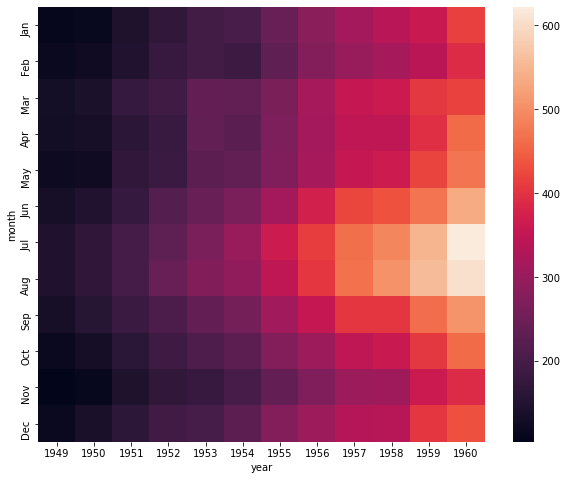

In [49]:
plt.figure(figsize=(10,8))
sns.heatmap(flights) #디폴트는 값이 표시안된다.
plt.show()

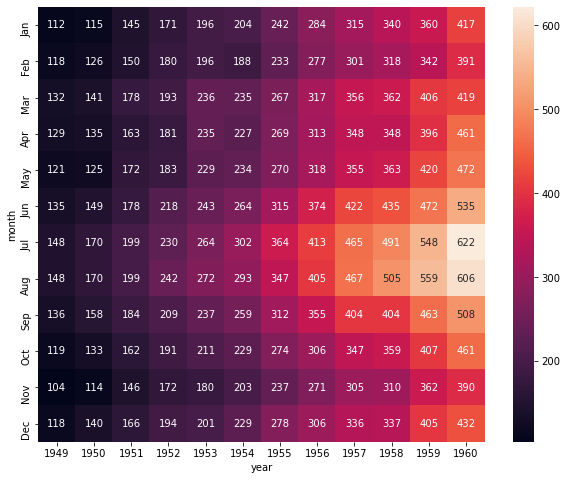

In [50]:
'''
y축은 month
x축은 year
value는 승객수
'''
plt.figure(figsize=(10,8))
sns.heatmap(flights,annot=True,fmt="d") #디폴트는 값이 표시안된다.
plt.show()